## Contrastive Predictive Coding

1. Prediction accuracy
2. Compare embedding to spectrogram

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from kws.dataset import build_dataset

In [2]:
pred_acc = np.loadtxt('accuracy.csv', delimiter=',')

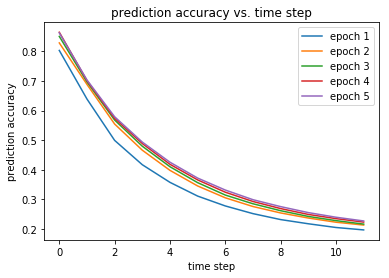

In [3]:
for i in range(5):
    plt.plot(pred_acc[i,:], label='epoch {}'.format(str(i+1)))
plt.title('prediction accuracy vs. time step')
plt.ylabel('prediction accuracy')
plt.xlabel('time step')
plt.legend()
plt.show()

In [4]:
def plot10(ds_type):
    config = {'ds_type': ds_type,
              'batch_sz': 64}
    for batch in build_dataset(config, 'val'):
        x, y = batch
        break
    x = np.transpose(x, axes=[0, 2, 1, 3])
    fig, axs = plt.subplots(5, 2, sharex=True)
    fig.set_size_inches(10, 10)
    for i in range(10):
        axs[i%5, i//5].imshow(x[i, :, :, 0], origin='lower')
    plt.show()
    return x

### Spectrograms

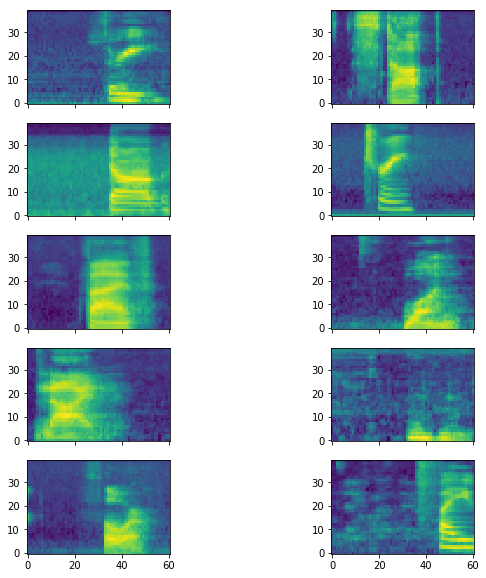

In [5]:
x = plot10('log-mel-spec')

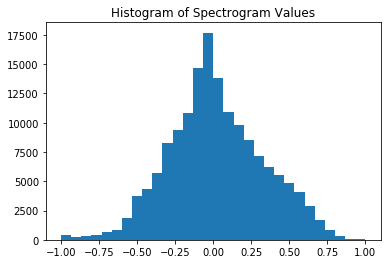

In [6]:
plt.hist(x.flatten(), bins=30)
plt.title('Histogram of Spectrogram Values')
plt.show()

### CPC Encoding

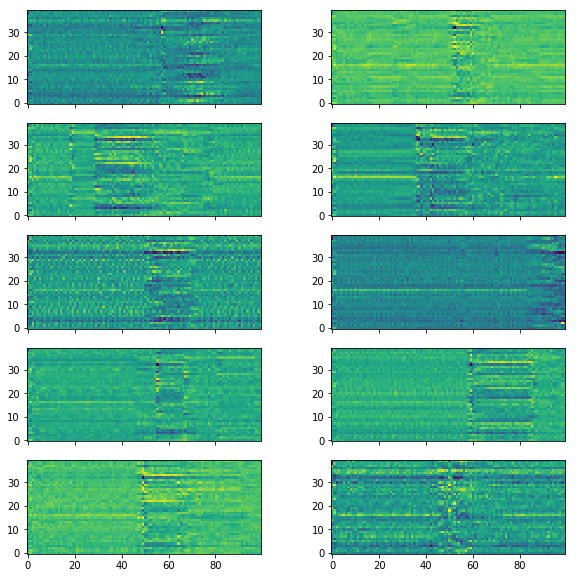

In [7]:
x = plot10('cpc-enc')

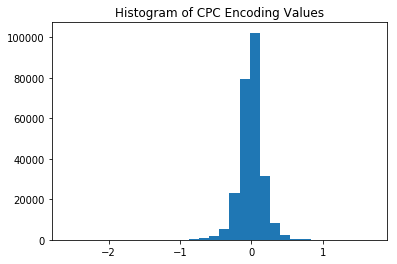

In [8]:
plt.hist(x.flatten(), bins=30)
plt.title('Histogram of CPC Encoding Values')
plt.show()